In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv(r'/content/Data.csv')
df

,State,Age,Salary,Purchased
0,Mumbai,44.0,72000.0,No
1,Bangalore,27.0,48000.0,Yes
2,Hyderabad,30.0,54000.0,No
3,Bangalore,38.0,61000.0,No
4,Hyderabad,40.0,NaN,Yes
5,Mumbai,35.0,58000.0,Yes
6,Bangalore,NaN,52000.0,No
7,Mumbai,48.0,79000.0,Yes
8,Hyderabad,50.0,83000.0,No
9,Mumbai,37.0,67000.0,Yes


In [81]:
y = df.iloc[:,3]
x = df.iloc[:,:3]
x

,State,Age,Salary
0,Mumbai,44.0,72000.0
1,Bangalore,27.0,48000.0
2,Hyderabad,30.0,54000.0
3,Bangalore,38.0,61000.0
4,Hyderabad,40.0,NaN
5,Mumbai,35.0,58000.0
6,Bangalore,NaN,52000.0
7,Mumbai,48.0,79000.0
8,Hyderabad,50.0,83000.0
9,Mumbai,37.0,67000.0


In [82]:
from sklearn.impute import SimpleImputer

In [83]:
SimpleImputer?

In [84]:
x.iloc[:,1:]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [85]:
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(x.iloc[:,1:])
x.iloc[:,1:] = imputer.transform(x.iloc[:,1:])

In [86]:
imputer?

In [87]:
x

,State,Age,Salary
0,Mumbai,44.000000,72000.000000
1,Bangalore,27.000000,48000.000000
2,Hyderabad,30.000000,54000.000000
3,Bangalore,38.000000,61000.000000
4,Hyderabad,40.000000,63777.777778
5,Mumbai,35.000000,58000.000000
6,Bangalore,38.777778,52000.000000
7,Mumbai,48.000000,79000.000000
8,Hyderabad,50.000000,83000.000000
9,Mumbai,37.000000,67000.000000


In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
LabelEncoder?

In [90]:
l_encoder = LabelEncoder()
l_encoder.fit(x.iloc[:,0])
x.iloc[:,0] = l_encoder.transform(x.iloc[:,0])

In [91]:
x

,State,Age,Salary
0,2,44.000000,72000.000000
1,0,27.000000,48000.000000
2,1,30.000000,54000.000000
3,0,38.000000,61000.000000
4,1,40.000000,63777.777778
5,2,35.000000,58000.000000
6,0,38.777778,52000.000000
7,2,48.000000,79000.000000
8,1,50.000000,83000.000000
9,2,37.000000,67000.000000


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
train_test_split?

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=14,test_size=0.3)

In [95]:
x_train

,State,Age,Salary
5,2,35.000000,58000.000000
4,1,40.000000,63777.777778
2,1,30.000000,54000.000000
1,0,27.000000,48000.000000
7,2,48.000000,79000.000000
6,0,38.777778,52000.000000
8,1,50.000000,83000.000000


In [96]:
x_test

,State,Age,Salary
3,0,38.0,61000.0
9,2,37.0,67000.0
0,2,44.0,72000.0


In [97]:
y_train

,Purchased
5,Yes
4,Yes
2,No
1,Yes
7,Yes
6,No
8,No


In [98]:
y_test

,Purchased
3,No
9,Yes
0,No


In [100]:
df = pd.read_csv(r'/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [102]:
x=df.iloc[:,0]
y = df.iloc[:,1]

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=14,test_size=0.2)

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [133]:
x_train = x_train.values.reshape(-1,1)  #Here -1 is length of the array
x_test = x_test.values.reshape(-1,1)

In [134]:
# model.fit?
model.fit(x_train,y_train)

LinearRegression()

In [135]:
y_pred = model.predict(x_test)

In [136]:
y_pred

array([ 39314.17492977,  81809.17014653,  72151.21668818,  44143.15165895,
       111748.82586744,  37382.5842381 ])

In [137]:
y_test

,Salary
2,37731
18,81363
15,67938
3,43525
25,105582
1,46205


In [138]:
import seaborn as sns

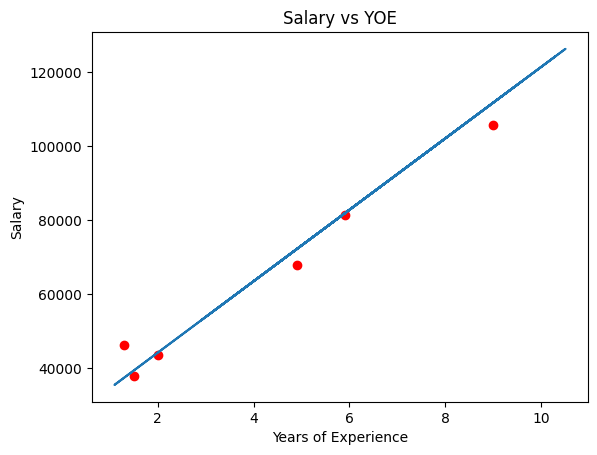

In [147]:
plt.scatter(x_test,y_test,color ="red")
plt.plot(x_train,model.predict(x_train))
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.title("Salary vs YOE")
plt.show()

In [148]:
model.intercept_

np.float64(24827.244742236726)

In [150]:
model.coef_

array([9657.95345836])

In [151]:
# y  =mx+c
salary_example = model.intercept_*7 + model.coef_
salary_example

array([183448.66665401])

# Stats

In [158]:
df.mean()

,0
YearsExperience,5.313333
Salary,76003.000000


In [164]:
df['Salary'].mode()

,Salary
0,37731
1,39343
2,39891
3,43525
4,46205
5,54445
6,55794
7,56642
8,56957
9,57081


In [165]:
df.var()

,0
YearsExperience,8.053609e+00
Salary,7.515510e+08


In [166]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [167]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [173]:
# ssr = explained error = sigma(y_pred-y_mean)
y_mean = y.mean()
ssr  = np.sum((y_pred - y_mean)**2)  #np.sum is equivalent to sigma function
ssr

np.float64(5178968248.367687)

In [176]:
# sse = y - y_pred
sse = np.sum((y_test-y_pred)**2)
sse

np.float64(136703578.14803672)

In [178]:
# sst = y -y_mean
sst = np.sum((y_test-y_mean)**2)
sst

np.float64(4376178338.0)

In [179]:
ssr+sse

np.float64(5315671826.515724)

In [181]:
r2 = ssr/sst
r2

np.float64(1.183445428491056)

In [ ]:
from sklearn.metrics import mean_squared_error

In [184]:
import pickle

In [185]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [186]:
import os

In [187]:
os.getcwd()

'/content'